## Example Use of Directly Running Virtual Solar Wind Monitor for Mars

This .ipynb notebook provides a simple use case example for using the vSWIM model availiable at [github.com/abbyazari/vSWIM](github.com/abbyazari/vSWIM). Please refer to the user guide at this Github repository for relevant citation and more information. 

If you need hourly data please see [github.com/abbyazari/vSWIM/Data](github.com/abbyazari/vSWIM/Data) and do not run the model directly.

Created by A. R. Azari on 1/31/2024


In [1]:
#import useful plotter functions
#and datetime functionality

from   src import vSWIM
import matplotlib.pyplot as plt
import datetime          as dt
import pandas            as pd

2024-05-15 00:50:20.968912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 1. Use vSWIM

In [2]:
#this will return the original dataset, maven from Halekas et al. 2017 for v0.0.0 of vSWIM
#https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JA023167
#See data sources and citations at https://github.com/abbyazari/vSWIM/tree/main?tab=readme-ov-file 
#if using this original file

#and the results of the model itself, both as pandas dataframes


#run vSWIM for second resolution data of vx for the first three days of January 2015 
maven, results = vSWIM.runvSWIM(cadence = 1, params = ['v_x_SW'], 
                                startDate = dt.datetime(2015, 1,  1),
                                stopDate  = dt.datetime(2015, 1,  4))

Reading in original MAVEN files.
Generating MAVEN orbit information.
Running from 2015-01-01 00:00:00 to 2015-01-04 00:00:00, in 3.0 segments, and for parameters:
v_x_SW

On 0 / 3 segments


### 2. Quick Check of Results

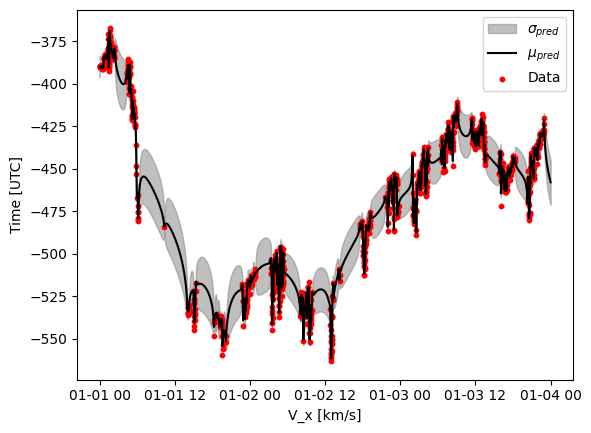

In [3]:
#plot original, Halekas et al., 2017 data (see data sources at https://github.com/abbyazari/vSWIM/tree/main) and model predictions

indMaven = ((maven.date_SW >= results['date_[utc]'].values[0]) & 
                (maven.date_SW <= results['date_[utc]'].values[-1]))


plt.fill_between(results['date_[utc]'], results['mu_v_x_SW']  - results['sigma_v_x_SW'], 
                                            results['mu_v_x_SW']  + results['sigma_v_x_SW'], 
                                                color = 'grey', alpha = 0.5, label = r'$\sigma_{pred}$')


plt.plot(results['date_[utc]'], results['mu_v_x_SW'], 'k', label = r'$\mu_{pred}$')
    
plt.scatter(maven.loc[indMaven, 'date_SW'], maven.loc[indMaven, 'v_x_SW'], 
                    s = 10, c = 'r', label = 'Data')

plt.xlabel('V_x [km/s]')

plt.ylabel('Time [UTC]')

plt.legend()

plt.show()

The model is showing expected results. 

### 3. Assess Results by Time to Recent MAVEN Measurement

In [4]:
#It is known that the mean predictions and the uncertainties for v_x degrade 
#if we are looking at data cumulatively within 10 days of a MAVEN data point
#see table within github.com/abbyazari/vSWIM/Citation.bib

Text(0, 0.5, 'Count')

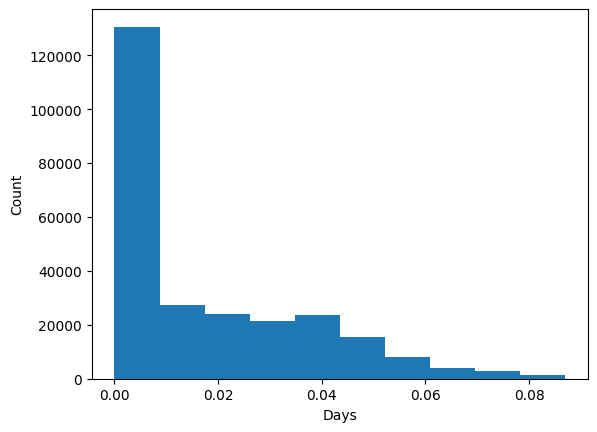

In [5]:
#How many days are we?

plt.hist(results.gap)

plt.xlabel('Days')

plt.ylabel('Count')

For this particular time period both the mean predictions and the uncertainities are well
under 10 days and thus we expect R$^{2}$ values close to 0.99 and reasonably accurate uncertainty estimates.